# View Closure Phase Spectrograms

In [1]:
import os
import h5py
import numpy as np

import sys
sys.path.append("/users/pkeller/code/ClosurePhaseAnalysis/")

from library import cptools as cp

from ipywidgets import interact

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# configure matplotlib
mpl.style.use("classic")

## Load Data
Load complex closure phase data. This data has been median-averaged over nights within two bins and subsequently mean-averaged in bins of 16 time integrations (~2.8 min).

In [2]:
path = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/EQ28_FC_B2_AVG.h5"

with h5py.File(path, "r") as f:
    lst = f["LST"][()]
    frq = f["FRQ"][()]
    eicp_xx = f["eicp XX (2)"][()]
    eicp_yy = f["eicp YY (2)"][()]
    trlist_xx = f["triads XX"][()]
    
path = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/EQ28_FC_B2.h5"

with h5py.File(path, "r") as f:
    bispec_xx = f["bispec"][0, :, 20]
    flags1 = f["JD-triad flags"][0, :, 20]
    flags2 = f["JD-LST flags"]
    bispec_xx[flags1] = np.nan
    bispec_xx[flags2] = np.nan
    bispec_xx = bispec_xx[np.where(~np.isnan(bispec_xx).all(axis=(1, 2)))]
    trlist = f["triads"][()]
    
# time data
lstmin, lstmax, lstN = np.min(lst), np.max(lst), len(lst)
dt = (lstmax - lstmin) * 3600 / lstN

print(f"XX data has shape {eicp_xx.shape}")
print(f"YY data has shape {eicp_yy.shape}")
print(r"LST range {:.2f}-{:.2f} h, integration time {:.2f} s".format(lstmin, lstmax, dt))
print(r"frequency range {:.2f}-{:.2f} MHz".format(min(frq), max(frq)))

XX data has shape (2, 57, 47, 161)
YY data has shape (2, 64, 47, 161)
LST range 4.02-6.22 h, integration time 168.60 s
frequency range 152.30-167.94 MHz


In [4]:
print(frq[:60])

[152.2971652  152.39491691 152.49266862 152.59042033 152.68817204
 152.78592375 152.88367546 152.98142717 153.07917889 153.1769306
 153.27468231 153.37243402 153.47018573 153.56793744 153.66568915
 153.76344086 153.86119257 153.95894428 154.05669599 154.1544477
 154.25219941 154.34995112 154.44770283 154.54545455 154.64320626
 154.74095797 154.83870968 154.93646139 155.0342131  155.13196481
 155.22971652 155.32746823 155.42521994 155.52297165 155.62072336
 155.71847507 155.81622678 155.91397849 156.01173021 156.10948192
 156.20723363 156.30498534 156.40273705 156.50048876 156.59824047
 156.69599218 156.79374389 156.8914956  156.98924731 157.08699902
 157.18475073 157.28250244 157.38025415 157.47800587 157.57575758
 157.67350929 157.771261   157.86901271 157.96676442 158.06451613]


/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


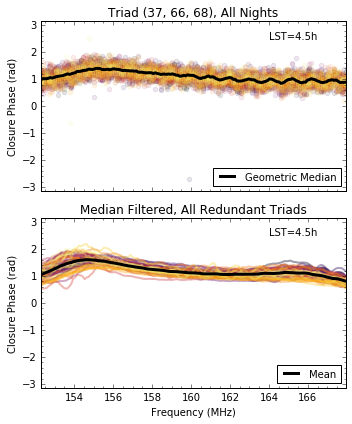

In [3]:
N = eicp_xx.shape[1]
fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True, sharey=True)

colors = plt.cm.inferno(np.linspace(0, 1, bispec_xx.shape[0]))

for i in range(bispec_xx.shape[0]):
    ax[0].scatter(frq, np.angle(bispec_xx[i, 10*16]), color=colors[i], alpha=0.1, s=20)

ax[0].plot(frq, np.angle(cp.geomed(np.nanmean(np.exp(1j*np.angle(bispec_xx[:, 160-8:160+8])), axis=0), axis=0)), color="k", linewidth=3, label="Geometric Median")
ax[0].set_xlim([min(frq), max(frq)])
ax[0].set_ylim([-np.pi, np.pi])
ax[0].set_title(f"Triad {tuple(trlist[20])}, All Nights")
ax[0].text(164, 2.5, f"LST={np.round(lst[10], 2)}h")
ax[0].set_ylabel("Closure Phase (rad)")
ax[0].legend(loc=4, fontsize=10)

colors = plt.cm.inferno(np.linspace(0, 1, eicp_xx.shape[1]))

for i in range(eicp_xx.shape[1]):
    ax[1].plot(frq, np.angle(np.nanmean(eicp_xx[:, i, 10], axis=0)), color=colors[i], alpha=0.4, linewidth=2)
    
ax[1].plot(frq, np.angle(np.nanmean(eicp_xx[:, :, 10], axis=(0, 1))), color="k", linewidth=3, label="Mean")
ax[1].set_title(f"Median Filtered, All Redundant Triads")
ax[1].set_xlim([min(frq), max(frq)])
ax[1].set_ylim([-np.pi, np.pi])
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Closure Phase (rad)")
ax[1].legend(loc=4, fontsize=10)
ax[1].text(164, 2.5, f"LST={np.round(lst[10], 2)}h")
plt.minorticks_on()
plt.tight_layout()
plt.savefig("/users/pkeller/code/H1C_IDR3.2/plots/cpspec_4.5h_B2_xx.png", dpi=400)

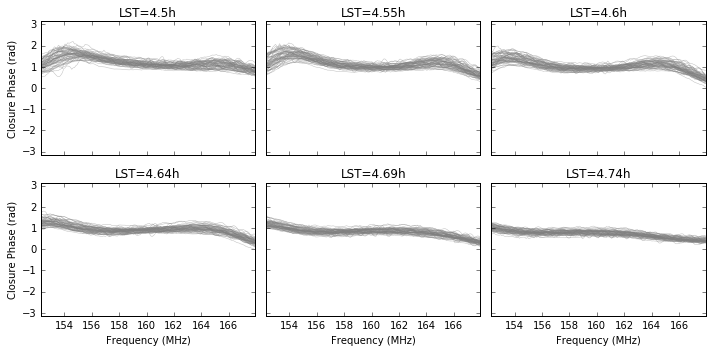

In [5]:
N = eicp_xx.shape[1]
fig, ax = plt.subplots(2, 3, figsize=(10, 5), sharex=True, sharey=True)
for l in range(3):
    for k in range(2):
        for i in range(N):
            ax[k, l].plot(frq, np.angle(np.mean(eicp_xx[:, i, 3 * k + l + 10], axis=0)), color="gray", alpha=0.5, linewidth=0.5)
            
        ax[k, l].set_xlim([min(frq), max(frq)])
        ax[k, l].set_ylim([-np.pi, np.pi])
        ax[k, l].set_title(f"LST={np.round(lst[3 * k + l + 10], 2)}h")
        
        if k == 1:
            ax[k, l].set_xlabel("Frequency (MHz)")
        if l == 0:
            ax[k, l].set_ylabel("Closure Phase (rad)")
            
plt.tight_layout()
plt.savefig("/users/pkeller/code/H1C_IDR3.2/nbooks/EQ14_FCB2/cpspec_4.5-4.74h_B2_xx.png", dpi=150)

In [ ]:
N = eicp_xx.shape[1]
fig, ax = plt.subplots(2, 3, figsize=(10, 5), sharex=True, sharey=True)
for l in range(3):
    for k in range(2):
        for i in range(N):
            ax[k, l].plot(frq, np.angle(np.mean(eicp_xx[:, i, 3 * k + l + 10], axis=0)), color="gray", alpha=0.2, linewidth=0.5)
        ax[k, l].plot(frq, np.angle(np.mean(eicp_xx[:, 33, 3 * k + l + 10], axis=0)), color="k", alpha=1, linewidth=2)
        ax[k, l].set_xlim([min(frq), max(frq)])
        ax[k, l].set_ylim([-np.pi, np.pi])
        ax[k, l].set_title(f"LST={np.round(lst[3 * k + l + 10], 2)}h")
        
        if k == 1:
            ax[k, l].set_xlabel("Frequency (MHz)")
        if l == 0:
            ax[k, l].set_ylabel("Closure Phase (rad)")
            
plt.tight_layout()
plt.savefig("/users/pkeller/code/H1C_IDR3.2/nbooks/EQ14_FCB2/cpspec_4.5-4.74h_B2_xx_ripple.png", dpi=150)

## Noise

In [4]:
noise_xx = (eicp_xx[1] - eicp_xx[0]) / np.sqrt(2)
noise_yy = (eicp_yy[1] - eicp_yy[0]) / np.sqrt(2)

## Plot Spectrograms

In [5]:
def plot(data, tr, pol=""):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharex=False, sharey=True)
    ax[0].imshow(
        np.angle(data[0, tr]),
        extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
        cmap=cm.twilight,
        interpolation="None",
        aspect="auto",
    )
    ax[1].imshow(
        np.angle(data[1, tr]),
        extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
        cmap=cm.twilight,
        interpolation="None",
        aspect="auto",
    )
    
    ax[0].set_title(f"Polarisation {pol}, Triad {trlist[tr]}, JD bin 1")
    ax[1].set_title(f"Polarisation {pol}, Triad {trlist[tr]}, JD bin 2")
    plt.setp(ax, xlabel="Frequency (MHz)", ylabel="LST (h)", ylim=[min(lst), max(lst)])
    
    plt.tight_layout()
    plt.show()

plot_xx = lambda tr: plot(eicp_xx, tr, pol="XX")
plot_yy = lambda tr: plot(eicp_yy, tr, pol="YY")

In [6]:
interact(plot_xx, tr=(0, eicp_xx.shape[1]-1))

interactive(children=(IntSlider(value=38, description='tr', max=76), Output()), _dom_classes=('widget-interact…

<function __main__.<lambda>(tr)>

In [7]:
interact(plot_yy, tr=(0, eicp_yy.shape[1]-1))

interactive(children=(IntSlider(value=41, description='tr', max=83), Output()), _dom_classes=('widget-interact…

<function __main__.<lambda>(tr)>

In [8]:
def plot(data, tr, pol=""):
    fig, ax = plt.subplots(1, 1, figsize=(9, 7))
    ax.imshow(
        data[tr],
        extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
        cmap=cm.bone,
        interpolation="None",
        aspect="auto",
        vmin=0,
        vmax=0.1
    )


    ax.set_title(f"Polarisation {pol}, Noise")
    plt.setp(ax, xlabel="Frequency (MHz)", ylabel="LST (h)", ylim=[min(lst), max(lst)])

    plt.tight_layout()
    plt.show()

plot_noise_xx = lambda tr: plot(np.abs(noise_xx), tr, pol="XX")
plot_noise_yy = lambda tr: plot(np.abs(noise_yy), tr, pol="YY")

In [9]:
interact(plot_noise_xx, tr=(0, noise_xx.shape[1]-1))

interactive(children=(IntSlider(value=23, description='tr', max=46), Output()), _dom_classes=('widget-interact…

<function __main__.<lambda>(tr)>

In [10]:
interact(plot_noise_yy, tr=(0, noise_yy.shape[1]-1))

interactive(children=(IntSlider(value=23, description='tr', max=46), Output()), _dom_classes=('widget-interact…

<function __main__.<lambda>(tr)>

## Average Triads

In [146]:
# compute inverse variance weights
var_xx = np.var(eicp_xx[1] - eicp_xx[0], axis=-1) / np.sqrt(2)
var_yy = np.var(eicp_yy[1] - eicp_yy[0], axis=-1) / np.sqrt(2)
w_xx = 1 / var_xx
w_yy = 1 / var_yy

In [149]:
eicp_xx_avg = np.moveaxis((np.moveaxis(eicp_xx, -1, 0) * w_xx).sum(axis=1) / w_xx.sum(), 0, -1)
eicp_yy_avg = np.moveaxis((np.moveaxis(eicp_yy, -1, 0) * w_yy).sum(axis=1) / w_yy.sum(), 0, -1)
noise_xx_avg = np.moveaxis((np.moveaxis(noise_xx, -1, 0) * w_xx).sum(axis=1) / w_xx.sum(), 0, -1)
noise_yy_avg = np.moveaxis((np.moveaxis(noise_yy, -1, 0) * w_yy).sum(axis=1) / w_yy.sum(), 0, -1)

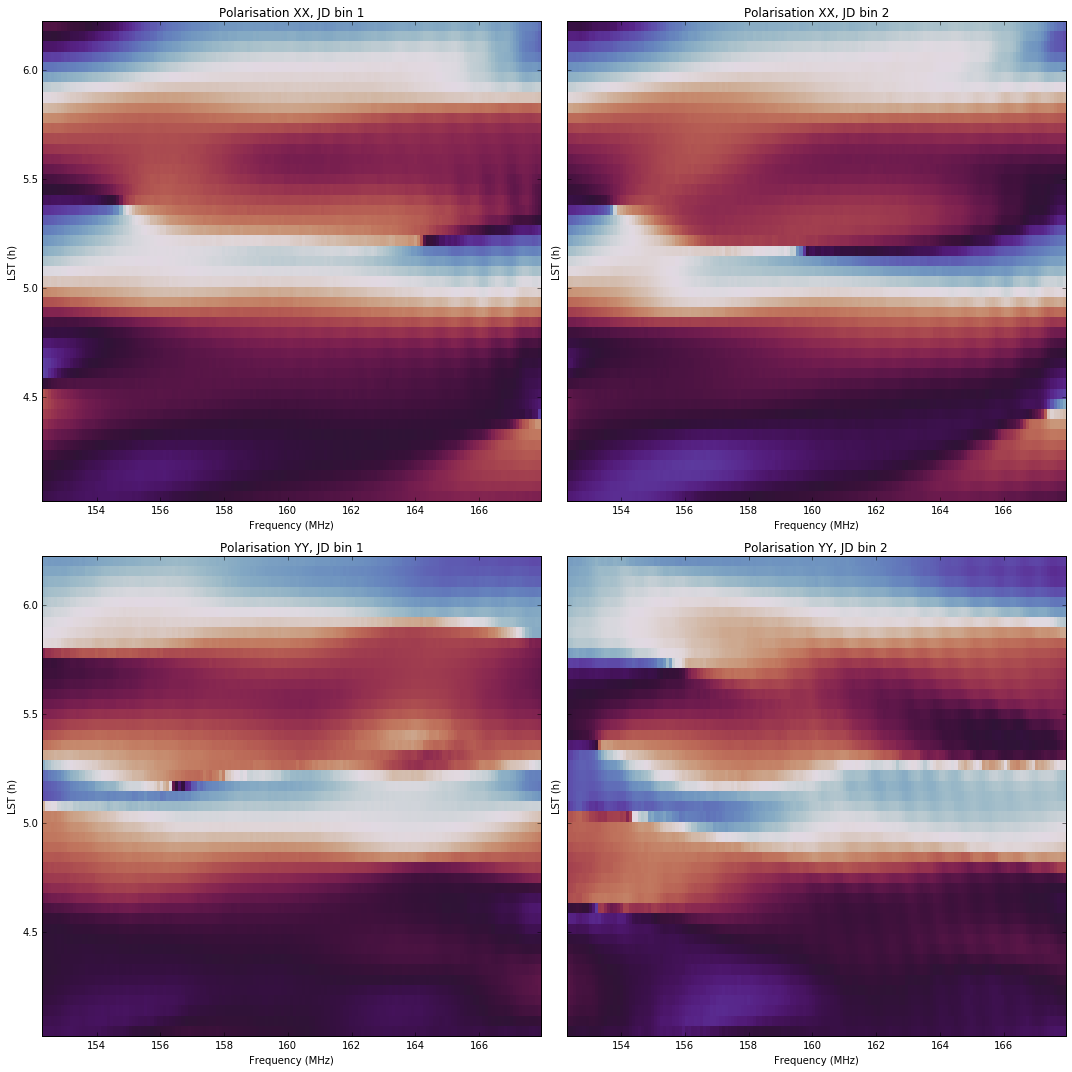

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharex=False, sharey=True)
ax[0, 0].imshow(
    np.angle(eicp_xx_avg[0]),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.twilight,
    interpolation="None",
    aspect="auto",
)
ax[0, 1].imshow(
    np.angle(eicp_xx_avg[1]),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.twilight,
    interpolation="None",
    aspect="auto",
)
ax[1, 0].imshow(
    np.angle(eicp_yy_avg[0]),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.twilight,
    interpolation="None",
    aspect="auto",
)
ax[1, 1].imshow(
    np.angle(eicp_yy_avg[1]),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.twilight,
    interpolation="None",
    aspect="auto",
)
    
ax[0, 0].set_title(f"Polarisation XX, JD bin 1")
ax[0, 1].set_title(f"Polarisation XX, JD bin 2")
ax[1, 0].set_title(f"Polarisation YY, JD bin 1")
ax[1, 1].set_title(f"Polarisation YY, JD bin 2")
plt.setp(ax, xlabel="Frequency (MHz)", ylabel="LST (h)", ylim=[min(lst), max(lst)])
    
plt.tight_layout()
plt.show()


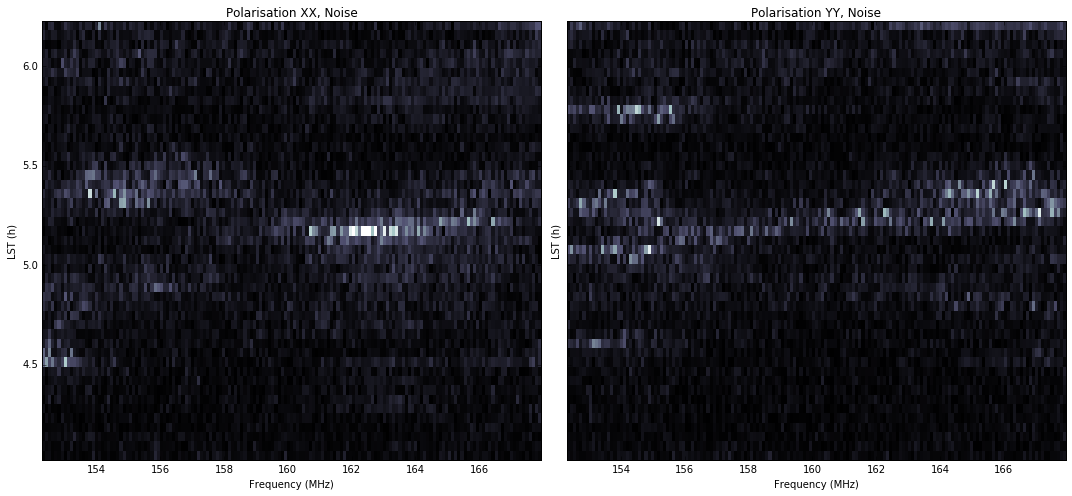

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
ax[0].imshow(
    np.abs(noise_xx_avg),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.bone,
    interpolation="None",
    aspect="auto",
    vmin=0,
    vmax=0.05,
)
ax[1].imshow(
    np.abs(noise_yy_avg),
    extent=(np.amin(frq), np.amax(frq), np.amin(lst), np.amax(lst)),
    cmap=cm.bone,
    interpolation="None",
    aspect="auto",
    vmin=0,
    vmax=0.05,
)

ax[0].set_title(f"Polarisation XX, Noise")
ax[1].set_title(f"Polarisation YY, Noise")
plt.setp(ax, xlabel="Frequency (MHz)", ylabel="LST (h)", ylim=[min(lst), max(lst)])
    
plt.tight_layout()
plt.show()


## Plot Slices

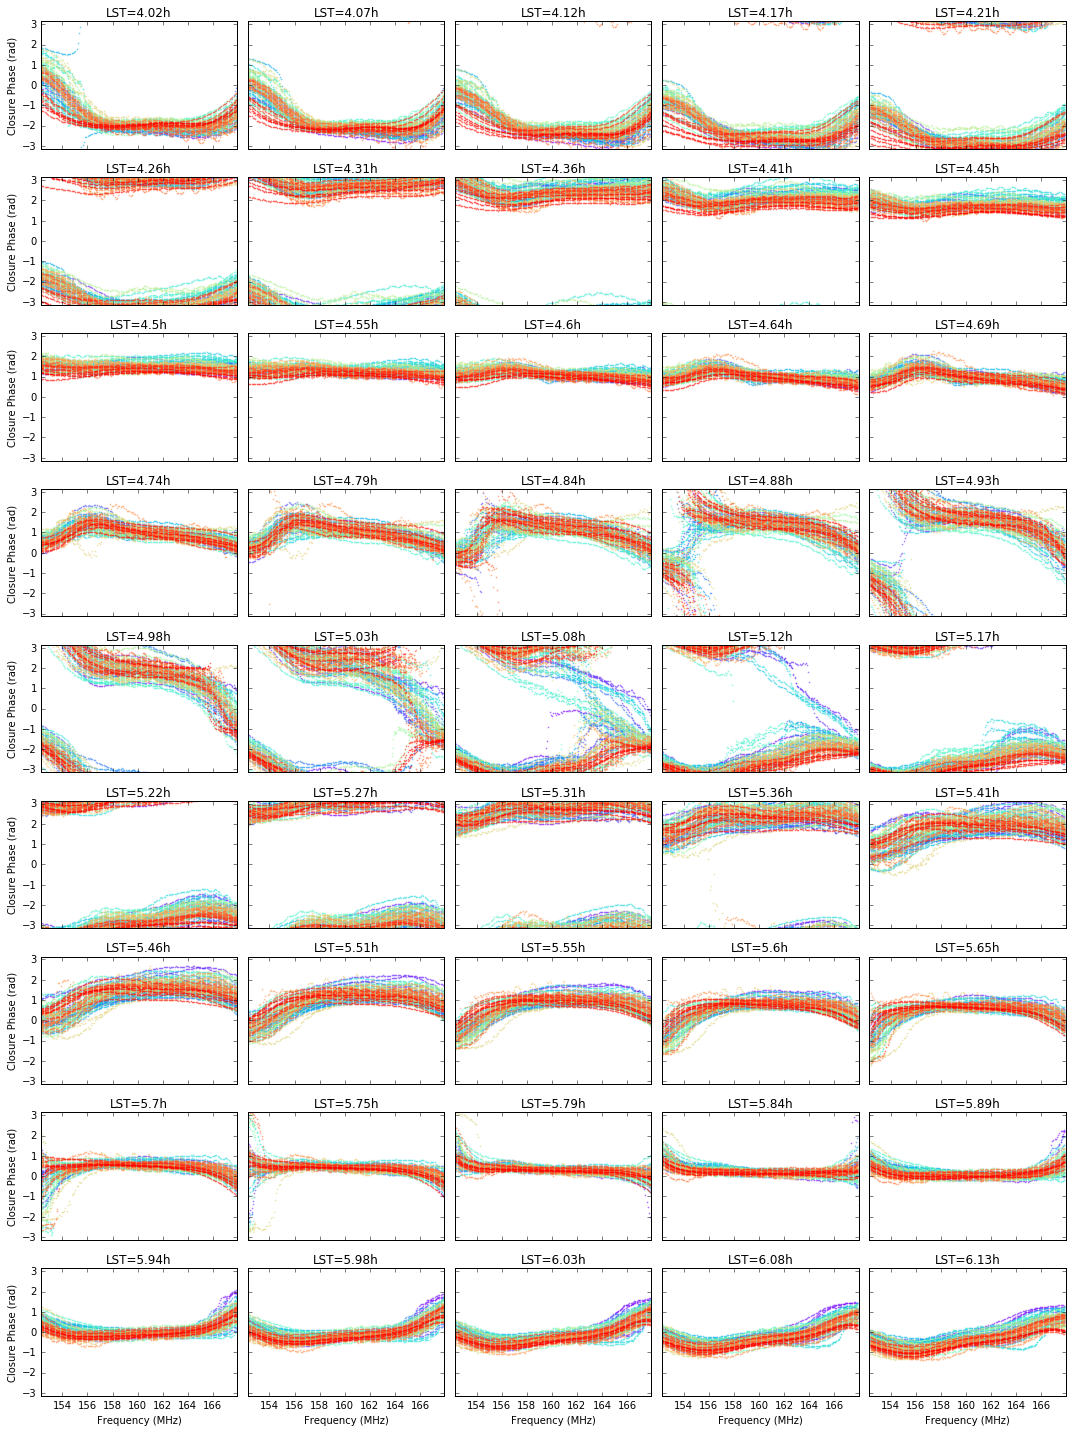

In [154]:
N = eicp_xx.shape[1]
fig, ax = plt.subplots(9, 5, figsize=(15, 20), sharex=True, sharey=True)
for l in range(5):
    for k in range(9):
        for i, color in enumerate(colors):
            ax[k, l].scatter(frq, np.angle(np.mean(eicp_xx[:, i, 5 * k + l], axis=0)), color=color, alpha=0.5, s=0.5)
            
        ax[k, l].set_xlim([min(frq), max(frq)])
        ax[k, l].set_ylim([-np.pi, np.pi])
        ax[k, l].set_title(f"LST={np.round(lst[5 * k + l], 2)}h")
        
        if k == 8:
            ax[k, l].set_xlabel("Frequency (MHz)")
        if l == 0:
            ax[k, l].set_ylabel("Closure Phase (rad)")
            
plt.tight_layout()

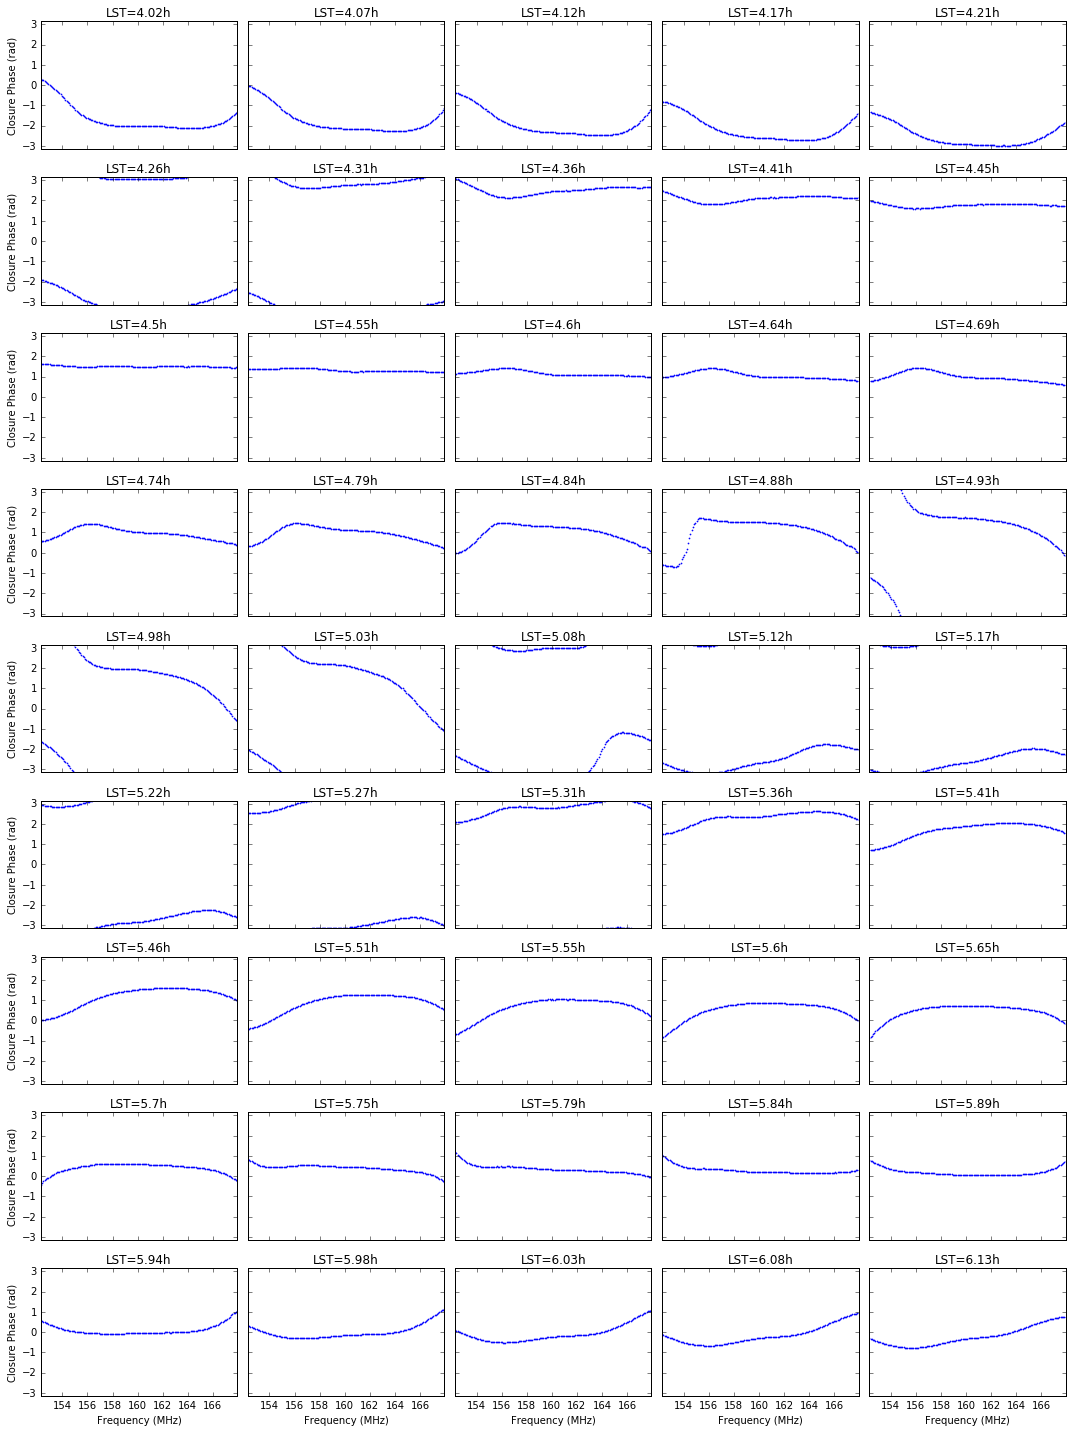

In [152]:
N = eicp_xx.shape[1]
fig, ax = plt.subplots(9, 5, figsize=(15, 20), sharex=True, sharey=True)
for l in range(5):
    for k in range(9):
        ax[k, l].scatter(frq, np.angle(np.mean(eicp_xx_avg[:, 5 * k + l], axis=0)), s=0.5, color="blue")
        ax[k, l].set_xlim([min(frq), max(frq)])
        ax[k, l].set_ylim([-np.pi, np.pi])
        ax[k, l].set_title(f"LST={np.round(lst[5 * k + l], 2)}h")
        
        if k == 8:
            ax[k, l].set_xlabel("Frequency (MHz)")
        if l == 0:
            ax[k, l].set_ylabel("Closure Phase (rad)")
            
plt.tight_layout()